In [ ]:
!pip install yfinance
import yfinance as yf
import pandas as pd
from sklearn.metrics import mean_squared_error

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 265 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
import datetime 
import matplotlib.pyplot as plt
import math
start = datetime.datetime(2018,1,1) 
end = datetime.datetime(2022, 12 ,7) 
Apple = yf.Ticker("AAPL") 
#print(Apple.history(start=start, end=end))
df_apple = Apple.history(start=start, end=end)
df_apple

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-05:00,40.451273,40.960004,40.237318,40.950493,102223600,0.0,0.0
2018-01-03 00:00:00-05:00,41.014674,41.494879,40.879172,40.943356,118071600,0.0,0.0
2018-01-04 00:00:00-05:00,41.017062,41.238148,40.907711,41.133549,89738400,0.0,0.0
2018-01-05 00:00:00-05:00,41.231014,41.689821,41.138301,41.601864,94640000,0.0,0.0
2018-01-08 00:00:00-05:00,41.447338,41.746870,41.347490,41.447338,82271200,0.0,0.0
...,...,...,...,...,...,...,...
2022-11-30 00:00:00-05:00,141.399994,148.720001,140.550003,148.029999,111224400,0.0,0.0
2022-12-01 00:00:00-05:00,148.210007,149.130005,146.610001,148.309998,71250400,0.0,0.0
2022-12-02 00:00:00-05:00,145.960007,148.000000,145.649994,147.809998,65421400,0.0,0.0


In [ ]:
def plot_predictions(test, predicted,company):
    plt.plot(test, color="red", label="real " + company +  " stock price")
    plt.plot(predicted, color="blue", label="predicted stock price")
    plt.title(company + " stock price prediction")
    plt.xlabel("time")
    plt.ylabel(company + " stock price")
    plt.legend()
    plt.show()

In [ ]:
def return_rmse(test, predicted,company):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("the root mean squared error " + company + " is :{}.".format(rmse))

In [ ]:
train_apple = df_apple[:'2021-10'].iloc[:,1:2].values #X # rest for training
test_apple = df_apple['2021-10':].iloc[:,1:2].values #Y #%23.6 for test set

In [ ]:
train_apple.shape

(965, 1)

In [ ]:
test_apple.shape

(298, 1)

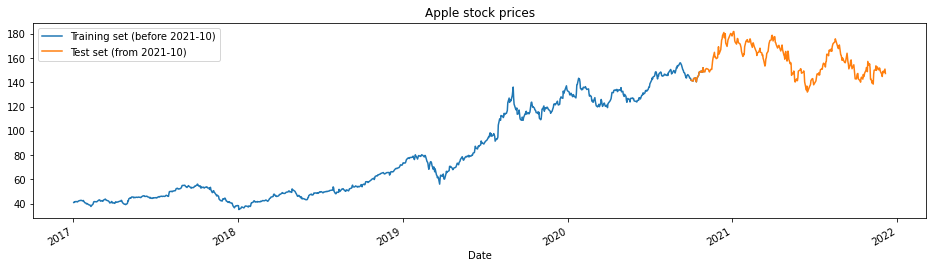

In [ ]:
import matplotlib.pyplot as plt
df_apple["High"][:'2021-10'].plot(figsize=(16,4), legend=True)
df_apple["High"]["2021-10":].plot(figsize=(16,4), legend=True)
plt.legend(["Training set (before 2021-10)", "Test set (from 2021-10)"])
plt.title("Apple stock prices")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
train_scaled_apple = sc.fit_transform(train_apple) # Scale X

In [ ]:
import math
import numpy as np
x_train_apple = []
y_train_apple = []

for i in range(60,965):
    x_train_apple.append(train_scaled_apple[i-60:i, 0]) #x_train scaled
    y_train_apple.append(train_scaled_apple[i,0]) #y_train_scaled

x_train_apple, y_train_apple = np.array(x_train_apple), np.array(y_train_apple)

In [ ]:
x_train_apple = np.reshape(x_train_apple, (x_train_apple.shape[0], x_train_apple.shape[1], 1)) #reshaping x_train for efficient modelling
x_train_apple.shape

(905, 60, 1)

In [ ]:
rows = df_apple.values.tolist()  # convert dataframe into a list
rows.reverse()


In [ ]:
df1 = df_apple.iloc[:,0:1]

In [ ]:
from sklearn.model_selection import train_test_split
x_train = []
y_train = []
x_test = []
y_test = []
X = []
Y = []
#X.append(pd.date_range(start=start,end=end))

X = df1.values.tolist()
start2 = datetime.datetime(2018,1,1) 
for row in rows:
    #X.append(pd.date_range(start2=start2,end=start2.timedelta(days=1)))
    #start2 += datetime.timedelta(days=1)
    Y.append(row[3])
    #print("Row 0 ",row)
    #print("Row 3" ,row[3])
x_train, x_test, y_train, y_test = train_test_split(X,Y,train_size=0.764,test_size=1 - 0.764, random_state=42) # split training and test data #exactly same split as gru

# Convert lists into numpy arrays 
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# reshape the values as we have only one input feature
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [ ]:
x_train.shape

(948, 1)

In [ ]:
x_test.shape

(294, 1)

In [ ]:
x_train_apple.shape

(905, 60, 1)

In [ ]:
y_train_apple.shape

(905,)

In [ ]:
# Convert lists into numpy arrays 
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

# reshape the values as we have only one input feature
x_train = x_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)

In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}  



In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4,7] # minimum sample number that can be stored in a leaf node
loss = [ "squared_error", "quantile"]

random_grid_gb = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,
'loss': loss
}

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
gb_random = RandomizedSearchCV(estimator = gb,param_distributions = random_grid_gb,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
gb_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'loss': ['squared_error', 'quantile'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4, 7],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
print ('Random grid: ', random_grid_gb, '\n')
# print the best parameters
print ('Best Parameters: ', gb_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4, 7], 'loss': ['squared_error', 'quantile']} 

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_features': 'auto', 'max_depth': 20, 'loss': 'squared_error'}  



In [ ]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid_svr = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid_svr = GridSearchCV(SVR(), param_grid_svr, refit = True, verbose = 3)
  
# fitting the model for grid search
grid_svr.fit(x_train, y_train)
#print(grid_svr.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid_svr.best_estimator_)

In [ ]:
from sklearn.linear_model import LinearRegression 
clf_lr = LinearRegression()
clf_lr.fit(x_train,y_train)
y_pred_lr = clf_lr.predict(x_test)

# Support Vector Machine with a Radial Basis Function as kernel 
from sklearn.svm import SVR
clf_svr = SVR(kernel='rbf', C=10, gamma=0.001)
clf_svr.fit(x_train,y_train)
y_pred_svr = clf_svr.predict(x_test)

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
clf_rf = RandomForestRegressor(n_estimators=100,min_samples_split = 10, min_samples_leaf=4,max_features = "auto", max_depth = 507, bootstrap = True)
clf_rf.fit(x_train,y_train)
y_pred_rf = clf_rf.predict(x_test)

# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
clf_gb = GradientBoostingRegressor(n_estimators=50,min_samples_split=6,min_samples_leaf = 7,max_features = "auto", max_depth = 20, loss = "squared_error")
clf_gb.fit(x_train,y_train)
y_pred_gb = clf_gb.predict(x_test)

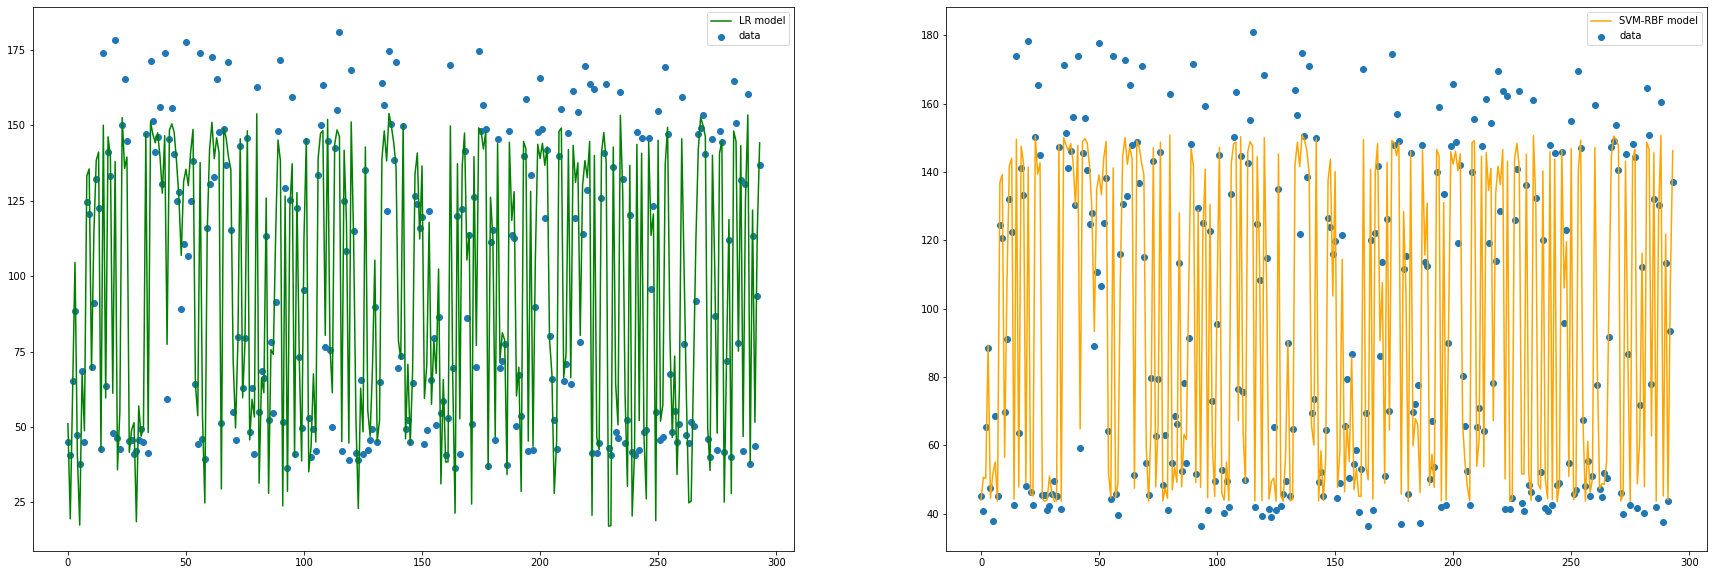

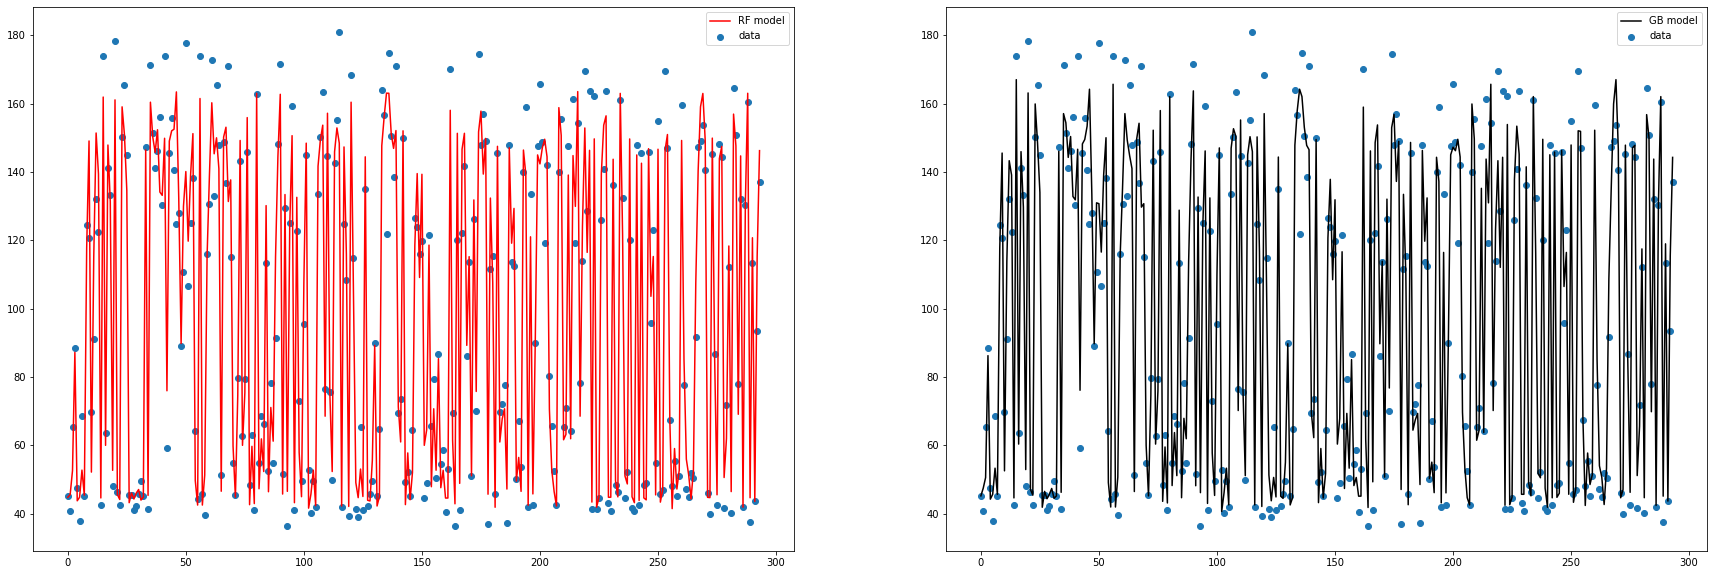

In [ ]:

import matplotlib.pyplot as plt 

f,(ax1,ax2) = plt.subplots(1,2,figsize=(30,10))

# Linear Regression
ax1.scatter(range(len(y_test)),y_test,label='data')
ax1.plot(range(len(y_test)),y_pred_lr,color='green',label='LR model')
ax1.legend()

# Support Vector Machine
ax2.scatter(range(len(y_test)),y_test,label='data')
ax2.plot(range(len(y_test)),y_pred_svr,color='orange',label='SVM-RBF model')
ax2.legend()

f1,(ax3,ax4) = plt.subplots(1,2,figsize=(30,10))

# Random Forest Regressor
ax3.scatter(range(len(y_test)),y_test,label='data')
ax3.plot(range(len(y_test)),y_pred_rf,color='red',label='RF model')
ax3.legend()

# Gradient Boosting Regressor
ax4.scatter(range(len(y_test)),y_test,label='data')
ax4.plot(range(len(y_test)),y_pred_gb,color='black',label='GB model')
ax4.legend()

In [ ]:
print("Accuracy of Linear Regerssion Model:",clf_lr.score(x_test,y_test))
print("Accuracy of SVM-RBF Model:",clf_svr.score(x_test,y_test))
print("Accuracy of Random Forest Model:",clf_rf.score(x_test,y_test))
print("Accuracy of Gradient Boosting Model:",clf_gb.score(x_test,y_test))

Accuracy of Linear Regerssion Model: 0.9112642341588302
Accuracy of SVM-RBF Model: 0.9364203317691309
Accuracy of Random Forest Model: 0.943042824590645
Accuracy of Gradient Boosting Model: 0.9387829926993682


In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test, y_pred_lr)
print("R^2 Score for Linear Regression: ", coefficient_of_dermination)

R^2 Score for Linear Regression:  0.9112642341588302


In [ ]:
import sklearn.metrics as metrics
print("Metrics of Linear Regression")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred_lr), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, y_pred_lr), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)), 4))
errors = abs(y_pred_lr - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Metrics of Linear Regression
Mean Absolute Error: 10.6984
Mean Squared Error: 194.1203
Root Mean Squared Error: 13.9327
Accuracy: 86.12 %.


In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test, y_pred_svr)
print("R^2 Score for SVR: ", coefficient_of_dermination)

R^2 Score for SVR:  0.9364203317691309


In [ ]:
import sklearn.metrics as metrics
print("Metrics of SVR")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred_svr), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, y_pred_svr), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_svr)), 4))
errors = abs(y_pred_svr - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Metrics of SVR
Mean Absolute Error: 8.8895
Mean Squared Error: 139.0883
Root Mean Squared Error: 11.7936
Accuracy: 90.25 %.


In [ ]:
import sklearn.metrics as metrics
print("Metrics of Random Forest")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred_rf), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, y_pred_rf), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)), 4))
errors = abs(y_pred_rf - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Metrics of Random Forest
Mean Absolute Error: 8.2572
Mean Squared Error: 124.6008
Root Mean Squared Error: 11.1625
Accuracy: 90.92 %.


In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test, y_pred_rf)
print("R^2 Score for Random Forest: ", coefficient_of_dermination)

R^2 Score for Random Forest:  0.943042824590645


In [ ]:
import sklearn.metrics as metrics
print("Metrics of Gradient Boosting Regressor")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, y_pred_gb), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, y_pred_gb), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb)), 4))
errors = abs(y_pred_gb - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Metrics of Gradient Boosting Regressor
Mean Absolute Error: 8.4463
Mean Squared Error: 133.9197
Root Mean Squared Error: 11.5724
Accuracy: 90.73 %.


In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(y_test, y_pred_gb)
print("R^2 Score for Gradient Boosting Regressor: ", coefficient_of_dermination)

R^2 Score for Gradient Boosting Regressor:  0.9387829926993682


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Bidirectional
from keras.optimizers import SGD


In [ ]:
# LSTM architecture

regressor_apple = Sequential()

# add first layer with dropout

regressor_apple.add(LSTM(units=50, return_sequences=True, input_shape=(x_train_apple.shape[1],1)))
regressor_apple.add(Dropout(0.2))

# add second layer

regressor_apple.add(LSTM(units=50, return_sequences=True))
regressor_apple.add(Dropout(0.2))

# add third layer

regressor_apple.add(LSTM(units=50, return_sequences=True))
regressor_apple.add(Dropout(0.2))

# add fourth layer

regressor_apple.add(LSTM(units=50))
regressor_apple.add(Dropout(0.2))

# the output layer

regressor_apple.add(Dense(units=1))

In [ ]:
# compiling the LSTM RNN network
regressor_apple.compile(optimizer='adam', loss='mean_squared_error')
# fit to the training set

regressor_apple.fit(x_train_apple, y_train_apple, epochs=10, batch_size=32)

Epoch 1/10
29/29 [==============================] - 12s 119ms/step - loss: 0.0299
Epoch 2/10
29/29 [==============================] - 3s 117ms/step - loss: 0.0055
Epoch 3/10
29/29 [==============================] - 3s 117ms/step - loss: 0.0053
Epoch 4/10
29/29 [==============================] - 3s 118ms/step - loss: 0.0050
Epoch 5/10
29/29 [==============================] - 3s 118ms/step - loss: 0.0050
Epoch 6/10
29/29 [==============================] - 3s 118ms/step - loss: 0.0040
Epoch 7/10
29/29 [==============================] - 3s 119ms/step - loss: 0.0042
Epoch 8/10
29/29 [==============================] - 3s 119ms/step - loss: 0.0040
Epoch 9/10
29/29 [==============================] - 3s 116ms/step - loss: 0.0034
Epoch 10/10
29/29 [==============================] - 3s 117ms/step - loss: 0.0035


In [ ]:
y_train_apple.shape

(905,)

In [ ]:
dataset_total_apple = pd.concat((df_apple['High'][:'2021-10'], df_apple['High']['2021-10':]), axis=0)
print(dataset_total_apple.shape)

inputs_apple = dataset_total_apple[len(dataset_total_apple)-len(test_apple)-60 : ].values
print(inputs_apple.shape)
inputs_apple = inputs_apple.reshape(-1,1)
print(inputs_apple.shape)
inputs_apple = sc.transform(inputs_apple)
print(inputs_apple.shape)

(1263,)
(358,)
(358, 1)
(358, 1)


In [ ]:
# preparing x_test
x_test_apple = []
for i in range(60,358):
    x_test_apple.append(inputs_apple[i-60:i, 0])
    
x_test_apple = np.array(x_test_apple)
x_test_apple = np.reshape(x_test_apple, (x_test_apple.shape[0], x_test_apple.shape[1], 1))

In [ ]:
predicted_apple = regressor_apple.predict(x_test_apple)
predicted_apple = sc.inverse_transform(predicted_apple)

10/10 [==============================] - 2s 30ms/step


In [ ]:
x_test_apple.shape

(298, 60, 1)

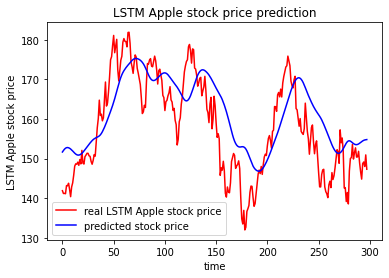

In [ ]:
plot_predictions(test_apple, predicted_apple, "LSTM Apple")

In [ ]:
import sklearn.metrics as metrics
print("Accuracy Scores with LSTM")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(test_apple, predicted_apple), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(test_apple, predicted_apple), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(test_apple, predicted_apple)), 4))
errors = abs(predicted_apple - test_apple)
mape = 100 * (errors / test_apple)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Accuracy Scores with LSTM
Mean Absolute Error: 7.2347
Mean Squared Error: 76.2336
Root Mean Squared Error: 8.7312
Accuracy: 95.31 %.


In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(test_apple, predicted_apple)
print("R^2 Score for LSTM: ", coefficient_of_dermination)

R^2 Score for LSTM:  0.4932731111361741


In [ ]:
# The GRU architecture
regressorGRU = Sequential()
# First GRU layer with Dropout regularisation
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train_apple.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Second GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train_apple.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Third GRU layer
regressorGRU.add(GRU(units=50, return_sequences=True, input_shape=(x_train_apple.shape[1],1), activation='tanh'))
regressorGRU.add(Dropout(0.2))
# Fourth GRU layer
regressorGRU.add(GRU(units=50, activation='tanh'))
regressorGRU.add(Dropout(0.2))
# The output layer
regressorGRU.add(Dense(units=1))

In [ ]:
regressorGRU.compile(optimizer="adam", loss='mean_squared_error')

# fitting the model

regressorGRU.fit(x_train_apple, y_train_apple, epochs=10, batch_size=32)

Epoch 1/10
29/29 [==============================] - 12s 123ms/step - loss: 0.0426
Epoch 2/10
29/29 [==============================] - 4s 142ms/step - loss: 0.0058
Epoch 3/10
29/29 [==============================] - 4s 143ms/step - loss: 0.0042
Epoch 4/10
29/29 [==============================] - 3s 120ms/step - loss: 0.0036
Epoch 5/10
29/29 [==============================] - 3s 120ms/step - loss: 0.0036
Epoch 6/10
29/29 [==============================] - 3s 120ms/step - loss: 0.0029
Epoch 7/10
29/29 [==============================] - 4s 121ms/step - loss: 0.0036
Epoch 8/10
29/29 [==============================] - 4s 122ms/step - loss: 0.0028
Epoch 9/10
29/29 [==============================] - 4s 121ms/step - loss: 0.0035
Epoch 10/10
29/29 [==============================] - 4s 120ms/step - loss: 0.0032


10/10 [==============================] - 2s 28ms/step


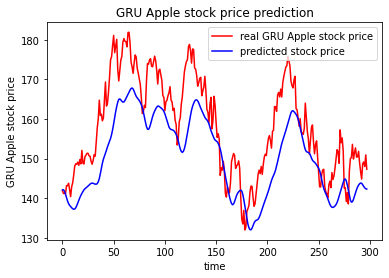

In [ ]:
predicted_with_gru_apple = regressorGRU.predict(x_test_apple)
predicted_with_gru_apple = sc.inverse_transform(predicted_with_gru_apple)

plot_predictions(test_apple, predicted_with_gru_apple, "GRU Apple")

In [ ]:
import sklearn.metrics as metrics
print("Accuracy Scores with GRU")
print("Mean Absolute Error:", round(metrics.mean_absolute_error(test_apple, predicted_with_gru_apple), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(test_apple, predicted_with_gru_apple), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(test_apple, predicted_with_gru_apple)), 4))
errors = abs(predicted_with_gru_apple - test_apple)
mape = 100 * (errors / test_apple)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Accuracy Scores with GRU
Mean Absolute Error: 8.3045
Mean Squared Error: 95.2918
Root Mean Squared Error: 9.7618
Accuracy: 94.85 %.


In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(test_apple, predicted_with_gru_apple)
print("R^2 Score for GRU: ", coefficient_of_dermination)

R^2 Score for GRU:  0.36659306900681987
